# Yelp API - Lab


## Introduction 

We've seen how the Yelp API works and how to create basic visualizations using Folium. It's time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 

* Using pagination and multiple functions, gather large amounts of data from an API, parse the data and make sense of it with meaningful analysis
* Create maps using Folium

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you but make the request below.

In [1]:
# Your code here
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)
  

In [2]:
  
keys = get_keys('/Users/freethrall/.secret/yelp_api.json')
api_key = keys['api_key']

In [3]:
import requests

term = 'bar'
location = 'Ithaca NY'
SEARCH_LIMIT = 5
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'Bearer {}'.format(api_key)}
url_params = {'term': term.replace(' ', '+'),
             'location': location.replace(' ', '+'),
             'limit': SEARCH_LIMIT, 
             'offset': 0}

In [4]:
response = requests.get(url, headers=headers, params=url_params)

In [5]:
response.status_code

200

## Pagination

Now that you have an initial response, you can examine the contents of the JSON container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [6]:
# Your code here; use a function or loop to retrieve all the results from your original request

response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [7]:
data = response.json()

In [8]:
data['businesses']

[{'id': '2zpObYpke5VlgflNn-mYEg',
  'alias': 'the-loft-ithaca',
  'name': 'The Loft',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/xlA82ezXzu8V94-b2vLJ2A/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/the-loft-ithaca?adjust_creative=bxfi5Q8CMydWDJvRn1VRqQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=bxfi5Q8CMydWDJvRn1VRqQ',
  'review_count': 14,
  'categories': [{'alias': 'bars', 'title': 'Bars'}],
  'rating': 5.0,
  'coordinates': {'latitude': 42.4418159486127,
   'longitude': -76.4896140741939},
  'transactions': [],
  'location': {'address1': '305 Stewart Ave',
   'address2': 'Fl 2',
   'address3': None,
   'city': 'Ithaca',
   'zip_code': '14850',
   'country': 'US',
   'state': 'NY',
   'display_address': ['305 Stewart Ave', 'Fl 2', 'Ithaca, NY 14850']},
  'phone': '+16076450152',
  'display_phone': '(607) 645-0152',
  'distance': 733.7898877986436},
 {'id': 'cnH0qX1HOrksbwLOEWl7Gg',
  'alias': 'bar-argos-ithaca',
  'name': 'Ba

In [9]:
import pandas as pd 

In [10]:
df = pd.DataFrame.from_dict(data['businesses'])

In [11]:
df.head(15)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,2zpObYpke5VlgflNn-mYEg,the-loft-ithaca,The Loft,https://s3-media4.fl.yelpcdn.com/bphoto/xlA82e...,False,https://www.yelp.com/biz/the-loft-ithaca?adjus...,14,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4418159486127, 'longitude': -7...",[],"{'address1': '305 Stewart Ave', 'address2': 'F...",+16076450152,(607) 645-0152,733.789888,NaN
1,cnH0qX1HOrksbwLOEWl7Gg,bar-argos-ithaca,Bar Argos,https://s3-media1.fl.yelpcdn.com/bphoto/kAUf2d...,False,https://www.yelp.com/biz/bar-argos-ithaca?adju...,57,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 42.4397202, 'longitude': -76.4930...",[],"{'address1': '408 E State St', 'address2': '',...",+16073194437,(607) 319-4437,671.643616,$$
2,sBlXj41G7RPtFYCfnOlD0g,fall-creek-house-ithaca,Fall Creek House,https://s3-media4.fl.yelpcdn.com/bphoto/NRqky9...,False,https://www.yelp.com/biz/fall-creek-house-itha...,14,"[{'alias': 'divebars', 'title': 'Dive Bars'}]",4.5,"{'latitude': 42.4527, 'longitude': -76.49496}",[],"{'address1': '302 Lake St', 'address2': '', 'a...",+16072774112,(607) 277-4112,841.394232,$
3,w312G0LS_gEYUDw4FbnSJg,bike-bar-ithaca,Bike Bar,https://s3-media3.fl.yelpcdn.com/bphoto/EXbSwb...,False,https://www.yelp.com/biz/bike-bar-ithaca?adjus...,1,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4396729451037, 'longitude': -7...",[],"{'address1': '314 E State St', 'address2': 'St...",,,625.933830,NaN
4,NrN-0SRAb33cVyTXHj3kPg,silky-jones-ithaca,Silky Jones,https://s3-media3.fl.yelpcdn.com/bphoto/s7dhok...,False,https://www.yelp.com/biz/silky-jones-ithaca?ad...,18,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",4.0,"{'latitude': 42.43974, 'longitude': -76.49616}",[],"{'address1': '214 E State St', 'address2': '',...",+16072883424,(607) 288-3424,581.441884,$


In [12]:
# set up the initial params with offset set to 0
term = 'bar'
location = 'Ithaca NY'
SEARCH_LIMIT = 10
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'Bearer {}'.format(api_key)}
url_params = {'term': term.replace(' ', '+'),
             'location': location.replace(' ', '+'),
             'limit': SEARCH_LIMIT, 
             'offset': 0}

# make initial call
response = requests.get(url, headers=headers, params=url_params)
data = response.json()

In [13]:
def get_yelp_businesses(offset):
    url_params = {'term': term.replace(' ', '+'),
             'location': location.replace(' ', '+'),
             'limit': SEARCH_LIMIT, 
             'offset': offset}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()
    return pd.DataFrame.from_dict(data['businesses'])

In [14]:
import time
# check the total, if > SEARCH_LIMIT
if data['total'] > SEARCH_LIMIT:
    # will need to pagenated the results
    # loop through the pages of data
    # inside loop concat the dataframes and use a delay
    df = pd.DataFrame.from_dict(data['businesses'])
    for i in range(SEARCH_LIMIT,data['total']+SEARCH_LIMIT,SEARCH_LIMIT):
        print(i)
        new_df = get_yelp_businesses(i)
        df = pd.concat([df, new_df], ignore_index=True, sort=False)
        time.sleep(1)
else:
    # got all the results in one call
    df = pd.DataFrame.from_dict(data['businesses'])

10
20
30
40
50
60


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
id               56 non-null object
alias            56 non-null object
name             56 non-null object
image_url        56 non-null object
is_closed        56 non-null bool
url              56 non-null object
review_count     56 non-null int64
categories       56 non-null object
rating           56 non-null float64
coordinates      56 non-null object
transactions     56 non-null object
location         56 non-null object
phone            56 non-null object
display_phone    56 non-null object
distance         56 non-null float64
price            47 non-null object
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 6.7+ KB


In [16]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,2zpObYpke5VlgflNn-mYEg,the-loft-ithaca,The Loft,https://s3-media4.fl.yelpcdn.com/bphoto/xlA82e...,False,https://www.yelp.com/biz/the-loft-ithaca?adjus...,14,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4418159486127, 'longitude': -7...",[],"{'address1': '305 Stewart Ave', 'address2': 'F...",+16076450152,(607) 645-0152,733.789888,NaN
1,cnH0qX1HOrksbwLOEWl7Gg,bar-argos-ithaca,Bar Argos,https://s3-media1.fl.yelpcdn.com/bphoto/kAUf2d...,False,https://www.yelp.com/biz/bar-argos-ithaca?adju...,57,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 42.4397202, 'longitude': -76.4930...",[],"{'address1': '408 E State St', 'address2': '',...",+16073194437,(607) 319-4437,671.643616,$$
2,sBlXj41G7RPtFYCfnOlD0g,fall-creek-house-ithaca,Fall Creek House,https://s3-media4.fl.yelpcdn.com/bphoto/NRqky9...,False,https://www.yelp.com/biz/fall-creek-house-itha...,14,"[{'alias': 'divebars', 'title': 'Dive Bars'}]",4.5,"{'latitude': 42.4527, 'longitude': -76.49496}",[],"{'address1': '302 Lake St', 'address2': '', 'a...",+16072774112,(607) 277-4112,841.394232,$
3,w312G0LS_gEYUDw4FbnSJg,bike-bar-ithaca,Bike Bar,https://s3-media3.fl.yelpcdn.com/bphoto/EXbSwb...,False,https://www.yelp.com/biz/bike-bar-ithaca?adjus...,1,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4396729451037, 'longitude': -7...",[],"{'address1': '314 E State St', 'address2': 'St...",,,625.933830,NaN
4,NrN-0SRAb33cVyTXHj3kPg,silky-jones-ithaca,Silky Jones,https://s3-media3.fl.yelpcdn.com/bphoto/s7dhok...,False,https://www.yelp.com/biz/silky-jones-ithaca?ad...,18,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",4.0,"{'latitude': 42.43974, 'longitude': -76.49616}",[],"{'address1': '214 E State St', 'address2': '',...",+16072883424,(607) 288-3424,581.441884,$


## Exploratory Analysis

Take the restaurants from the previous question and do an initial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [17]:
# Your code here
import seaborn as sns

In [18]:
df.describe()

,review_count,rating,distance
count,56.000000,56.000000,56.000000
mean,68.071429,3.821429,1797.811276
std,92.039687,0.741182,2302.773585
min,1.000000,2.000000,237.052681
25%,15.000000,3.500000,635.813648
50%,31.000000,4.000000,837.985826
75%,85.250000,4.500000,1368.739591
max,381.000000,5.000000,10858.799126


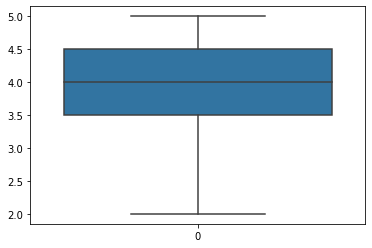

In [19]:
plot = sns.boxplot(data=df['rating'])

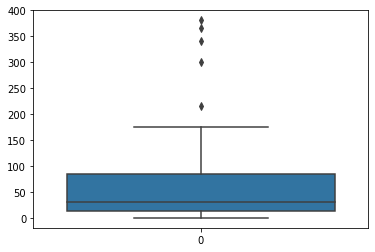

In [20]:
rc_plot = sns.boxplot(data=df['review_count'])

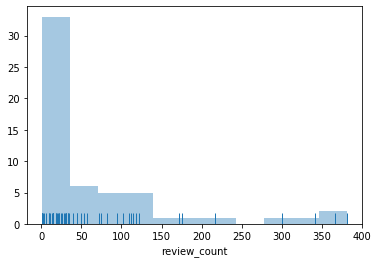

In [22]:
sns.distplot(df['review_count'], kde=False, rug=True)

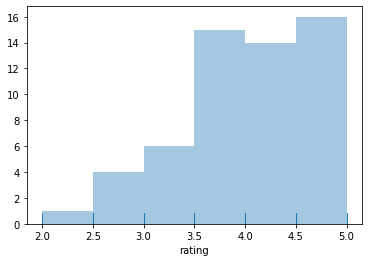

In [23]:
sns.distplot(df['rating'], kde=False, rug=True)

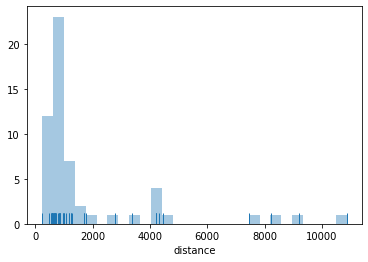

In [24]:
sns.distplot(df['distance'], kde=False, rug=True)

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [32]:
# Your code here
# pull out the latitude and longitude into their own columns
# df_w_coords = 
df['latitude'] = df.coordinates.map(lambda x: x['latitude'])
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude
0,2zpObYpke5VlgflNn-mYEg,the-loft-ithaca,The Loft,https://s3-media4.fl.yelpcdn.com/bphoto/xlA82e...,False,https://www.yelp.com/biz/the-loft-ithaca?adjus...,14,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4418159486127, 'longitude': -7...",[],"{'address1': '305 Stewart Ave', 'address2': 'F...",+16076450152,(607) 645-0152,733.789888,NaN,42.441816
1,cnH0qX1HOrksbwLOEWl7Gg,bar-argos-ithaca,Bar Argos,https://s3-media1.fl.yelpcdn.com/bphoto/kAUf2d...,False,https://www.yelp.com/biz/bar-argos-ithaca?adju...,57,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 42.4397202, 'longitude': -76.4930...",[],"{'address1': '408 E State St', 'address2': '',...",+16073194437,(607) 319-4437,671.643616,$$,42.439720
2,sBlXj41G7RPtFYCfnOlD0g,fall-creek-house-ithaca,Fall Creek House,https://s3-media4.fl.yelpcdn.com/bphoto/NRqky9...,False,https://www.yelp.com/biz/fall-creek-house-itha...,14,"[{'alias': 'divebars', 'title': 'Dive Bars'}]",4.5,"{'latitude': 42.4527, 'longitude': -76.49496}",[],"{'address1': '302 Lake St', 'address2': '', 'a...",+16072774112,(607) 277-4112,841.394232,$,42.452700
3,w312G0LS_gEYUDw4FbnSJg,bike-bar-ithaca,Bike Bar,https://s3-media3.fl.yelpcdn.com/bphoto/EXbSwb...,False,https://www.yelp.com/biz/bike-bar-ithaca?adjus...,1,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4396729451037, 'longitude': -7...",[],"{'address1': '314 E State St', 'address2': 'St...",,,625.933830,NaN,42.439673
4,NrN-0SRAb33cVyTXHj3kPg,silky-jones-ithaca,Silky Jones,https://s3-media3.fl.yelpcdn.com/bphoto/s7dhok...,False,https://www.yelp.com/biz/silky-jones-ithaca?ad...,18,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",4.0,"{'latitude': 42.43974, 'longitude': -76.49616}",[],"{'address1': '214 E State St', 'address2': '',...",+16072883424,(607) 288-3424,581.441884,$,42.439740


In [33]:
df['longitude'] = df.coordinates.map(lambda x: x['longitude'])

In [34]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,latitude,longitude
0,2zpObYpke5VlgflNn-mYEg,the-loft-ithaca,The Loft,https://s3-media4.fl.yelpcdn.com/bphoto/xlA82e...,False,https://www.yelp.com/biz/the-loft-ithaca?adjus...,14,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4418159486127, 'longitude': -7...",[],"{'address1': '305 Stewart Ave', 'address2': 'F...",+16076450152,(607) 645-0152,733.789888,NaN,42.441816,-76.489614
1,cnH0qX1HOrksbwLOEWl7Gg,bar-argos-ithaca,Bar Argos,https://s3-media1.fl.yelpcdn.com/bphoto/kAUf2d...,False,https://www.yelp.com/biz/bar-argos-ithaca?adju...,57,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 42.4397202, 'longitude': -76.4930...",[],"{'address1': '408 E State St', 'address2': '',...",+16073194437,(607) 319-4437,671.643616,$$,42.439720,-76.493057
2,sBlXj41G7RPtFYCfnOlD0g,fall-creek-house-ithaca,Fall Creek House,https://s3-media4.fl.yelpcdn.com/bphoto/NRqky9...,False,https://www.yelp.com/biz/fall-creek-house-itha...,14,"[{'alias': 'divebars', 'title': 'Dive Bars'}]",4.5,"{'latitude': 42.4527, 'longitude': -76.49496}",[],"{'address1': '302 Lake St', 'address2': '', 'a...",+16072774112,(607) 277-4112,841.394232,$,42.452700,-76.494960
3,w312G0LS_gEYUDw4FbnSJg,bike-bar-ithaca,Bike Bar,https://s3-media3.fl.yelpcdn.com/bphoto/EXbSwb...,False,https://www.yelp.com/biz/bike-bar-ithaca?adjus...,1,"[{'alias': 'bars', 'title': 'Bars'}]",5.0,"{'latitude': 42.4396729451037, 'longitude': -7...",[],"{'address1': '314 E State St', 'address2': 'St...",,,625.933830,NaN,42.439673,-76.494928
4,NrN-0SRAb33cVyTXHj3kPg,silky-jones-ithaca,Silky Jones,https://s3-media3.fl.yelpcdn.com/bphoto/s7dhok...,False,https://www.yelp.com/biz/silky-jones-ithaca?ad...,18,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",4.0,"{'latitude': 42.43974, 'longitude': -76.49616}",[],"{'address1': '214 E State St', 'address2': '',...",+16072883424,(607) 288-3424,581.441884,$,42.439740,-76.496160


In [35]:
import folium

In [40]:
lat = 42.444
long = -76.502

bar_map = folium.Map([lat, long], zoom_start=13)
bar_map

In [42]:
# add the bars as markers
for index, bar in enumerate(df['name']):
    lat = df.iloc[index]['latitude']
    long = df.iloc[index]['longitude']
    popup_text = bar
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat,long], popup=popup)
    marker.add_to(bar_map)
bar_map

## Summary

Nice work! In this lab, you've made multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice interactive map to display the results using Folium! Well done!